In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
#No missing values in the dataset, so need of imputation

In [10]:
df["mainroad"]=df["mainroad"].map({"yes":1, "no":0})

In [12]:
df["guestroom"]=df["guestroom"].map({"yes":1, "no":0})
df["basement"]=df["basement"].map({"yes":1, "no":0})
df["hotwaterheating"]=df["hotwaterheating"].map({"yes":1, "no":0})
df["airconditioning"]=df["airconditioning"].map({"yes":1, "no":0})
df["prefarea"]=df["prefarea"].map({"yes":1, "no":0})

In [13]:
df=pd.get_dummies(df,columns=["furnishingstatus"],drop_first=True)

In [14]:
df.nunique()

price                              219
area                               284
bedrooms                             6
bathrooms                            4
stories                              4
mainroad                             2
guestroom                            0
basement                             0
hotwaterheating                      0
airconditioning                      0
parking                              4
prefarea                             2
furnishingstatus_semi-furnished      2
furnishingstatus_unfurnished         2
dtype: int64

In [37]:
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_area = df["area"].quantile(0.25)
Q3_area = df["area"].quantile(0.75)
IQR_area = Q3_area - Q1_area

df = df[
    (df["price"] >= Q1_price - 1.5 * IQR_price) & (df["price"] <= Q3_price + 1.5 * IQR_price) &
    (df["area"] >= Q1_area - 1.5 * IQR_area) & (df["area"] <= Q3_area + 1.5 * IQR_area)
]

In [24]:
x=df[["area"]]
y=df["price"]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
print(x_train.isnull().sum())


area    0
dtype: int64


In [40]:
y_pred = model.predict(x_test)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2279660501775.0747
R² Score: 0.2683817496878155


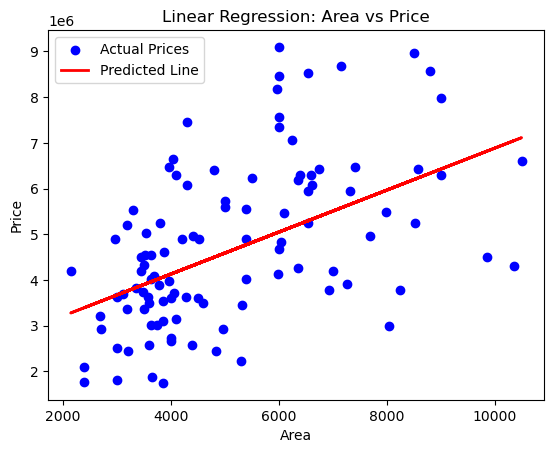

In [42]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [43]:
predicted_price = model.predict([[3000]]) 
print("Predicted price for 3000 sqft:", predicted_price[0])


Predicted price for 3000 sqft: 3672182.084004318


C:\Users\Jyoshika\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
